# Análisis para Showz

Showz es una empresa de <span style="color: gold;">**venta de entradas de eventos.**</span>

## Objetivo:
Optimizar los gastos del departamento de marketing

### Objetivos específicos:
- Identificar cómo los clientes usan el servicio

- Cuándo empiezan a comprar

- Cuánto dinero aporta cada cliente a la compañía (LTV)

- Cuándo los ingresos cubren el costo de adquisición de los clientes (ROM

## Pasos a seguir
1) Preparación de datos (cargar y limpiar datos)
2) Elaborar informes (gráficos para diferentes dispositivos y fuentes de anuncios y cambio con el tiempo)

    **Informe de visitas**
    * Calcular el DAU, WAU y MAU
    * Sesiones por día
    * Duración de la sesión (ASL)
    * Tasa de retención

    **Informe de ventas**
	* Tiempo entre el registro y la conversión
	* Número de pedidos durante un periodo
	* Tamaño promedio de compra
	* LTV

    **Informe de marketing**
    * ¿Cuánto dinero se gastó?
    * Costo de adquisición de clientes (CAC) para cada fuente
    * Rentabilidad de la inversión (ROMI)

3) Conclusión sobre la inversión en marketing:
* ¿Qué fuentes/plataformas recomendarías?
* ¿en qué métricas te enfocaste? ¿Por qué?
* ¿Qué conclusiones sacaste después de encontrar los valores métricos?

## Diccionario de datos
**Visits** (registros de visitas al sitio web)
* ``uid``: identificador único del usuario
* ``device``: dispositivo del usuario
* ``start ts``: fecha y hora de inicio de la sesión
* ``end ts``: fecha y hora de término de la sesión
* ``source id``: identificador de la fuente de anuncios de la que proviene el usuario

**Orders** (pedidos)
* ``uid``: identificador único del usuario que realiza un pedido
* ``buy ts``: fecha y hora del pedido
* ``revenue``: el ingreso de Showz por el pedido

**Costs** (gastos de marketing)
* ``source_id``: identificador de la fuente de anuncios
* ``dt``: fecha
* ``costs``: gastos en esta fuente de anuncios en este día

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización general de los datos

In [2]:
# importar los datasets
visits = pd.read_csv('visits_log_us.csv')
orders = pd.read_csv('orders_log_us.csv')
costs = pd.read_csv('costs_us.csv')

In [3]:
# información de 'visits'
visits.info()
print('\n', visits.sample(5))
print('\n', 'Hay', visits.duplicated().sum(), 'valores duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

          Device               End Ts  Source Id             Start Ts  \
300514  desktop  2017-09-11 00:53:00          5  2017-09-11 00:45:00   
27880   desktop  2017-12-22 15:15:00          4  2017-12-22 15:06:00   
99297   desktop  2017-10-26 13:58:00          5  2017-10-26 13:50:00   
88138   desktop  2017-11-05 12:46:00          3  2017-11-05 12:46:00   
258803  desktop  2017-10-16 23:00:00          4  2017-10-16 22:58:00   

                         Uid  
300514  14323047409979465644  
27880   17846345711907737199  
99297    86620964369

In [4]:
# información general de 'orders'
orders.info()
print('\n', orders.sample(5))
print('\n', 'Hay', orders.duplicated().sum(), 'valores duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

                     Buy Ts  Revenue                   Uid
15186  2017-10-29 15:40:00     2.44  17227431051439344562
18157  2017-11-17 20:32:00     3.97   7620609931888936881
38078  2018-03-04 10:51:00     7.39  13888745432979765063
17011  2017-11-11 11:43:00     1.22  11914678231542624012
28538  2018-01-08 17:18:00     4.89   5668348187865973075

 Hay 0 valores duplicados


In [5]:
# información general de 'costs'
costs.info()
print('\n', costs.sample(5))
print('\n', 'Hay', costs.duplicated().sum(), 'valores duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

       source_id          dt   costs
2235         10  2017-07-27    0.54
247           1  2018-02-03   51.00
27            1  2017-06-28   38.48
2476         10  2018-03-25   16.25
1292          4  2017-12-21  219.21

 Hay 0 valores duplicados


### Comentario
En ninguno de los DataFrames hay valores duplicados ni ausentes, solo hay que realizar algunas modificaciones en los nombres de las columnas y algunos tipos de datos.

* **costs**
  * Convertir “dt” a formato fecha
* **orders**
  * Convertir “buy ts” a formato fecha
  * Convertir nombres de las columnas
* **visits**
  * Convertir “end ts” y “start ts” a formato fecha
  * Convertir nombres de las columnas


# Limpieza de datos

In [6]:
# formato nombre de columnas
orders.columns = orders.columns.str.replace(' ', '_').str.lower()
visits.columns = visits.columns.str.replace(' ', '_').str.lower()


In [7]:
# manejo de fechas
costs['dt'] = pd.to_datetime(costs['dt'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

# Limpieza de datos

In [ ]:
# formato nombre de columnas
orders.columns = orders.columns.str.replace(' ', '_').str.lower()
visits.columns = visits.columns.str.replace(' ', '_').str.lower()


In [ ]:
# manejo de fechas
costs['dt'] = pd.to_datetime(costs['dt'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])


# Reporte de visitas

In [ ]:
# obtener día, semana y mes de la sesión
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_month'] = visits['start_ts'].dt.month_name()
visits['session_year'] = visits['start_ts'].dt.isocalendar().year

In [ ]:
# duración por sesión en segundos
visits['duration'] = (
    visits['end_ts'] - visits['start_ts']
).dt.seconds

# se excentan las sesiones con duración de 0 segundos
visit_report = visits[visits['duration'] > 0]

In [ ]:
# DAU, WAU, MAU
dau = (
    visit_report.groupby(['session_year', 'session_date'])
    .agg({'uid':'nunique'})
    .mean()
    .round()
    .astype(int)
)

wau = (
    visit_report.groupby(['session_year', 'session_week'])
    .agg({'uid':'nunique'})
    .mean()
    .round()
    .astype(int)
)

mau = (
    visit_report.groupby(['session_year', 'session_month'])
    .agg({'uid':'nunique'})
    .mean()
    .round()
    .astype(int)
)

# factor de adherencia de los usuarios
sticky_factor = (dau / mau) * 100
sticky_factor = sticky_factor.round().astype(int)

print(f'DAU {dau.iloc[0]} usuarios')
print(f'WAU {wau.iloc[0]} usuarios')
print(f'MAU {mau.iloc[0]} usuarios')
print(f'Factor de adherencia de los usuarios {sticky_factor.iloc[0]}%')

DAU 818 usuarios
WAU 5148 usuarios
MAU 20956 usuarios
Factor de adherencia de los usuarios 4%


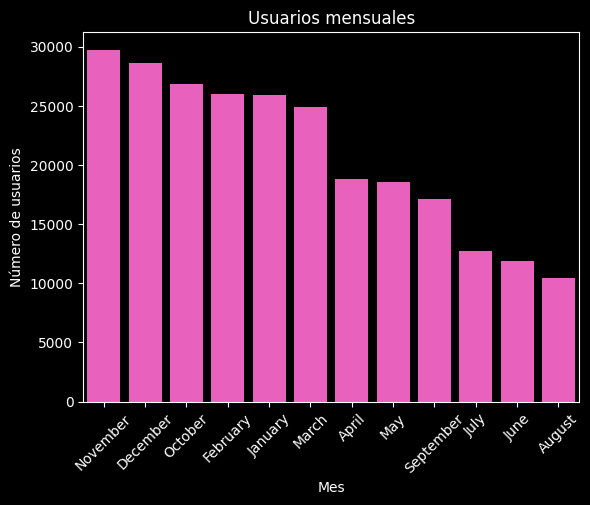

In [ ]:
# usuarios mensuales
usuarios_per_month = (
    visit_report.groupby('session_month')
    .agg({'uid':'nunique'})
    .sort_values(by='uid', ascending=False)
)

# gráfico de barras: usuarios mensuales
plt.style.use('dark_background')
sns.barplot(usuarios_per_month,
            x='session_month',
            y='uid',
            color='#FF4AC4'
)
plt.title('Usuarios mensuales')
plt.xlabel('Mes')
plt.ylabel('Número de usuarios')
plt.xticks(rotation=45)
plt.show()

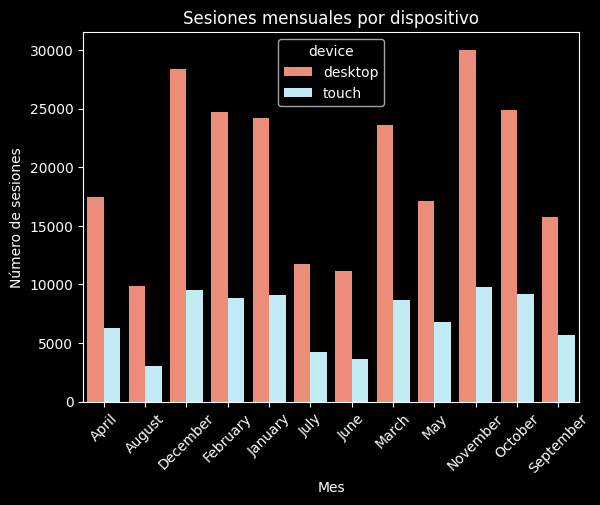

In [ ]:
# sesiones mensuales por dispositivo
sessions_per_device = (
    visit_report.groupby(['session_month', 'device'])
    .agg({'uid':'count'})
    .reset_index()
)

# gráfico de barras: sesiones mensuales por dispositivo
sns.barplot(sessions_per_device,
            x='session_month',
            y='uid',
            hue='device',
            palette={
                'desktop':'#FF8066',
                'touch': '#B8F1FF'
            })
plt.title('Sesiones mensuales por dispositivo')
plt.xlabel('Mes')
plt.ylabel('Número de sesiones')
plt.xticks(rotation=45)
plt.show()

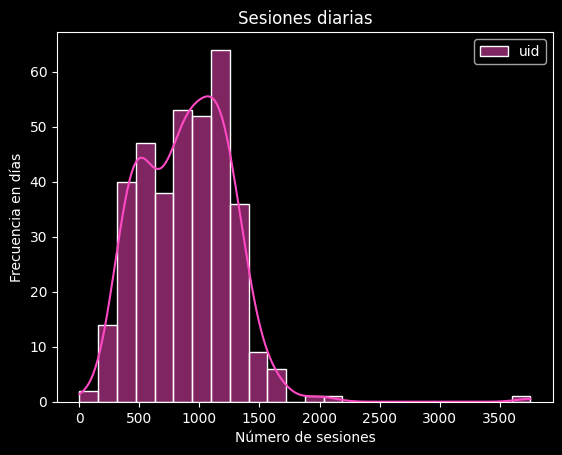

In [ ]:
# número de sesiones diarias
sessions_per_day = (
    visit_report.groupby('session_date')
    .agg({'uid':'count'})
)

# histograma: número de sesiones diarias
sns.histplot(sessions_per_day,
             palette={'uid':'#FF4AC4'},
             kde=True)
plt.title('Sesiones diarias')
plt.xlabel('Número de sesiones')
plt.ylabel('Frecuencia en días')
plt.show()

In [ ]:
# promedio de sesiones al día
mean_sessions = sessions_per_day.mean().round().astype(int)
# media de sesiones al día
median_sessions = sessions_per_day.median().round().astype(int)

print(f'Media {mean_sessions.iloc[0]} sesiones por día')
print(f'Mediana {median_sessions.iloc[0]} sesiones por día')

Media 889 sesiones por día
Mediana 898 sesiones por día


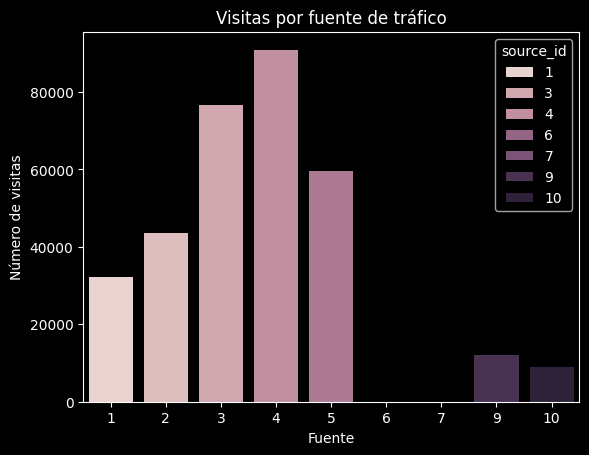

In [ ]:
# número de visitas por fuente de tráfico
visit_per_source = (
    visit_report.groupby('source_id')
    .agg({'uid':'count'})
)

# gráfico de barras: número de visitas por fuente de tráfico
sns.barplot(visit_per_source,
            x='source_id',
            y='uid',
            hue='source_id'
)

plt.title('Visitas por fuente de tráfico')
plt.xlabel('Fuente')
plt.ylabel('Número de visitas')
plt.show()

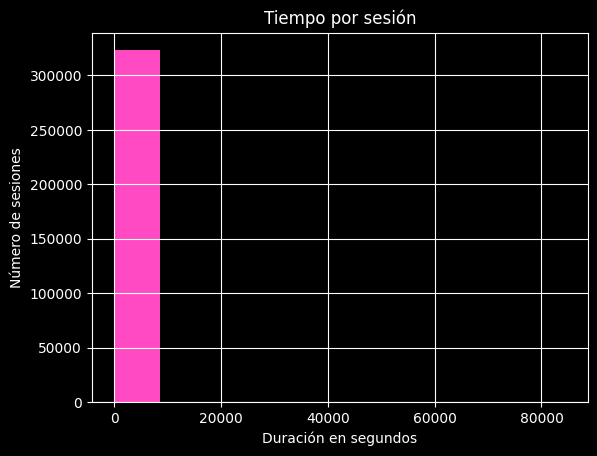

In [ ]:
# histograma de duración por sesión
visit_report['duration'].hist(
    color='#FF4AC4'
)
plt.title('Tiempo por sesión')
plt.xlabel('Duración en segundos')
plt.ylabel('Número de sesiones')
plt.show()

In [ ]:
# estadísticos descriptivos de 'duration'
duration = visit_report['duration'].describe()

# moda de la duración de las sesiones
asl = visit_report['duration'].mode()

print(duration)
print('\n',f'ASL {asl.iloc[0]} segundos')

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: duration, dtype: float64

 ASL 60 segundos


### Comentario
El reporte de visitas se compone del periodo 01 junio 2017 - 31 mayo 2018. El reporte contenía registros de sesiones con duración de 0 segundos, estos registros fueron omitidos ya que pudieron deberse a algún fallo del portal o conexión por parte del usuario, sin embargo, es de importancia comentarlo para confirmar cómo tratar estos registros.

Durante el periodo, mensualmente tuvimos 20,956 usuarios promedio, con un factor de adherencia del 4% (4/100 usuarios volvían a la plataforma), donde se puede apreciar que el dispositivo más usado por los usuarios es el “Desktop” y en su mayoría las sesiones duraron 60 segundos. Durante el último trimestre de 2017 se registró nuestra mayor cantidad de usuarios.

A lo largo del periodo 2017 - 2018 mantuvimos un rango de alrededor de 900 sesiones diarias, con variaciones menores entre días. Hubo pocas ocasiones en que llegamos a tener más del doble de sesiones, siendo particularmente el 24/11/17 el día con mayor número de sesiones.

La pricipal fuente de tráfico fue la 4 y la 3.
